# SAXS Integration

### This script integrates the SAXS profiles of all frames in assigned area and plot the integral area profiles.
The final figure: x = scan number, y = normalized integral area

### The script allows uses to define these parameters:
1. The frame number: x
2. The q range for integration: q1, q2, q3, q4

## 0.1C cycle
### Import the data & integrate the SAXS profiles 

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
from scipy import integrate

### The q range for the integration had been checked

# q = 0.02, row = 44
# q = 0.03, row = 108
# q = 0.04, row = 172
# q = 0.05, row = 236
# q = 0.06, row = 300
# q = 0.07, row = 365
# q = 0.08, row = 429
# q = 0.09, row = 493
# q = 0.10, row = 557

# for q = 0.00 ~ 0.02314
q1 = 0
q2 = 64

# for q = 0.03 ~ 0.06
q3 = 108
q4 = 300

In [23]:
empty = []
empty2 = []

### Assign the frame numbers

for x in range(20,29):

    path_data = 'C:/Users/opid31/Desktop/graphite_SnO2_BT2/SAXS/SAXS_3/01_01C/'
    file_name = '01_01C_0001_'
    frame = '_00%02d.dat' %x
    file_BG = '01_01C_0001_0006_00%02d.dat' %x


    ###import BG
    BG = pd.read_csv(path_data + file_BG, delimiter='    ', skiprows=23, nrows=400, names= ['q','BG'], engine='python')

    ###import data
    dfs=[]

    # scan 05~78: lithiation
    # scan 78~90: hold
    # scan 90~167: Delithiation

    for i in range(250): 
        name = file_name+ '%04d' %i + frame
        if name in os.listdir(path_data):
            dfs.append(pd.read_csv(path_data + name, delimiter='    ', skiprows=23, nrows=400, usecols=[1] , names= ['%d'%i], engine='python'))
        else:
            continue

    ###combine data

    finaldfs = pd.concat(dfs, axis=1) #This will be the BG subtracted one
    withBG =  pd.concat(dfs, axis=1) 


    ### BG subtraction
    for col in finaldfs.columns :
        finaldfs[col] = finaldfs[col] - BG['BG']

    del finaldfs['6']
    del withBG['6']
 
    ### Because some values are negative, the whole data frame is added by a value to make all values positive
    finaldfs = finaldfs + abs(min(finaldfs.min()))
    
    for col in withBG.columns :
        withBG[col] = (withBG[col]-withBG[col].min())/(withBG[col].max()-withBG[col].min())
    
    SAXS = pd.DataFrame()
    SAXS2 = pd.DataFrame()

    xcol = BG['q'][q1:q2]

    i = 0
    for col in finaldfs.columns:
        ycol = finaldfs[col][q1:q2]
        SAXS.loc[i,'%d'%x] = integrate.simpson(ycol, xcol)
        i = i+1    
    empty.append(SAXS)
    
    xcol2 = BG['q'][q3:q4]
    j = 0
    for col in withBG.columns:
        ycol2 = withBG[col][q3:q4]
        SAXS2.loc[j,'%d'%x] = integrate.simpson(ycol2, xcol2)
        j = j+1    
    empty2.append(SAXS2)
    
    
SAXS_integral = pd.concat(empty, axis=1) ### BGS 
SAXS_integral2 = pd.concat(empty2, axis=1)  ### WBG

In [11]:
for row in range(0,len(BG['q'])):
    if abs(BG.loc[row,'q']-0.02314)<0.0001:
        print(2.314,row, BG.loc[row,'q'])
    else:
        continue
# q = 0.02, row = 44
# q = 0.03, row = 108
# q = 0.04, row = 172
# q = 0.05, row = 236
# q = 0.06, row = 300
# q = 0.07, row = 365
# q = 0.08, row = 429
# q = 0.09, row = 493
# q = 0.10, row = 557

2.314 64 0.0231506


In [9]:
BG

,q,BG
0,0.013181,2.400010e+09
1,0.013337,2.291156e+09
2,0.013493,2.219621e+09
3,0.013648,2.157677e+09
4,0.013804,2.111553e+09
...,...,...
995,0.168176,1.001782e+07
996,0.168332,1.043142e+07
997,0.168488,1.053236e+07
998,0.168644,1.068793e+07


### Normalized the inegral data

In [24]:
for col in SAXS_integral.columns :
    SAXS_integral[col] = (SAXS_integral[col]-SAXS_integral[col].min())/(SAXS_integral[col].max()-SAXS_integral[col].min())
    
for col in SAXS_integral2.columns :
    SAXS_integral2[col] = (SAXS_integral2[col]-SAXS_integral2[col].min())/(SAXS_integral2[col].max()-SAXS_integral2[col].min())

In [25]:
scan = pd.DataFrame()

scan['scan'] = finaldfs.columns

In [16]:
SAXS_integral.to_csv('01_lithiation_SAXS integration_BGS.csv', index=False)
SAXS_integral2.to_csv('01_lithiation_SAXS integration_WGS.csv', index=False)

In [26]:
d1 = BG.loc[q1,'q']
d2 = BG.loc[q2,'q']
d3 = BG.loc[q3,'q']
d4 = BG.loc[q4,'q']

### Plot the figure

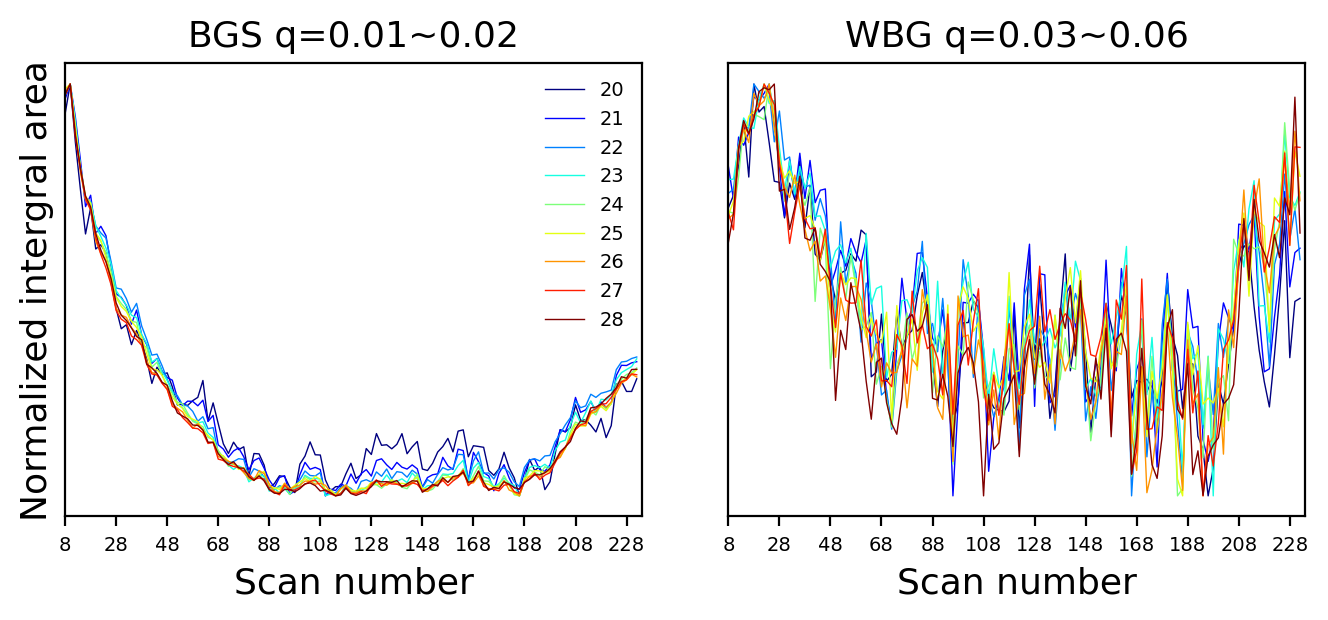

In [31]:
fig = plt.figure(figsize=(8, 3), dpi=200)
grid = plt.GridSpec(1, 2, hspace=0.25, wspace=0.15)

scannum = int(SAXS_integral.columns[-1])
startnum = int(SAXS_integral.columns[0])
colnum = len(SAXS_integral.columns)

cmap = plt.cm.get_cmap("jet")
norm = mpl.colors.Normalize(vmin = startnum, vmax = scannum)

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

### plot and set the color
colors = plt.cm.jet(np.linspace(0, 1, colnum))


SAXS_BGS = fig.add_subplot(grid[0, 0])
SAXS_WBG = fig.add_subplot(grid[0, 1])


i=0
for col in SAXS_integral.columns:
    SAXS_BGS.plot(scan['scan'], SAXS_integral[col], color=colors[i], lw=0.5)
    i=i+1

SAXS_BGS.set_xlabel('Scan number',fontdict={'fontsize':13})
SAXS_BGS.set_ylabel('Normalized intergral area',fontdict={'fontsize':13})
#SAXS_BGS.set_ylim(0.5e7, 1.2e7)
SAXS_BGS.set_xlim(0,len(finaldfs.columns))
SAXS_BGS.set_xticks(np.arange(0, len(finaldfs.columns) , step = 10 ))
SAXS_BGS.set_title('BGS q='+'%.2f~'%d1+'%.2f'%d2 ,fontdict={'fontsize':13})
SAXS_BGS.tick_params(axis='y',
                    which='both',      # both major and minor ticks are affected                         
                    left=False,
                    right=False,
                    labelright=False,
                    labelleft=False,
                    labelsize=8.0)  
SAXS_BGS.tick_params(axis='x',labelsize=7.0)
#SAXS_BGS.axvspan(32, 39, color='plum', alpha=0.5, lw=0)
SAXS_BGS.legend(SAXS_integral.columns, frameon=False, fontsize=7)

i=0
for col in SAXS_integral2.columns:
    SAXS_WBG.plot(scan['scan'], SAXS_integral2[col], color=colors[i], lw=0.5)
    i=i+1

SAXS_WBG.set_xlabel('Scan number',fontdict={'fontsize':13})
SAXS_WBG.set_xlim(0,len(finaldfs.columns))
SAXS_WBG.set_xticks(np.arange(0, len(finaldfs.columns) , step = 10))
SAXS_WBG.set_title('WBG q='+'%.2f~'%d3+'%.2f'%d4 ,fontdict={'fontsize':13})
SAXS_WBG.tick_params(axis='y',
                    which='both',      # both major and minor ticks are affected                         
                    left=False,
                    right=False,
                    labelright=False,
                    labelleft=False,
                    labelsize=7.0)  
SAXS_WBG.tick_params(axis='x',labelsize=7.0)
#SAXS_WBG.axvspan(32, 39, color='plum', alpha=0.5, lw=0)
    
"""ticks = list(range(startnum, scannum,1))
cbar = plt.colorbar(mappable = sm, ticks=ticks, format=mpl.ticker.ScalarFormatter(), 
                    shrink=1.0, fraction=0.1, pad=0.01, label='Frame number')"""

plt.savefig('BT2_01C SAXS integration' +'%.2f~'%d1 +'%.2f.png'%d2, bbox_inches='tight')

## 0.2C cycle

In [19]:
empty_relax = []
empty_relax2 = []

for x in range(20,29):
    path_BG = 'C:/Users/opid31/Desktop/graphite_SnO2_BT2/SAXS/SAXS_3/01_01C/'
    file_BG = '01_01C_0001_0006_00%02d.dat' %x
    
    path_data='C:/Users/opid31/Desktop/graphite_SnO2_BT2/SAXS/SAXS_3/02_02C/'

    file_name = '02_02C_0001_'
    frame = '_00%02d.dat' %x

    ###import BG
    BG_relax = pd.read_csv(path_BG + file_BG, delimiter='    ', skiprows=23, nrows=1000, names= ['q','BG'], engine='python')

    ###import data
    dfs=[]

    #r1: 11~34
    #r2: 42~65
    #r3: 81~128 (middle)
    #r4: 140~164
    #r5: 172~196
    #r6: 204~230

    for i in range(250): 
        name = file_name+ '%04d' %i + frame
        if name in os.listdir(path_data):
            dfs.append(pd.read_csv(path_data + name, delimiter='    ', skiprows=23, nrows=1000, usecols=[1] , names= ['%d'%i], engine='python'))
        else:
            continue

    ###combine data

    finaldfs_relax = pd.concat(dfs, axis=1) #This will be the BG subtracted one
    withBG_relax =  pd.concat(dfs, axis=1) 


    ###BG subtraction
    for col in finaldfs_relax.columns :
        finaldfs_relax[col] = finaldfs_relax[col] - BG_relax['BG']

    finaldfs_relax = finaldfs_relax + abs(min(finaldfs_relax.min()))
    
    SAXS_relax = pd.DataFrame()
    SAXS_relax2 = pd.DataFrame()

    xcol = BG_relax['q'][q1:q2]

    i = 0
    for col in finaldfs_relax.columns:
        ycol = finaldfs_relax[col][q1:q2]
        SAXS_relax.loc[i,'%d'%x] = integrate.simpson(ycol, xcol)
        i = i+1    
    empty_relax.append(SAXS_relax)
    
    xcol2 = BG_relax['q'][q3:q4]
    j = 0
    for col in withBG_relax.columns:
        ycol2 = withBG_relax[col][q3:q4]
        SAXS_relax2.loc[j,'%d'%x] = integrate.simpson(ycol2, xcol2)
        j = j+1    
    empty_relax2.append(SAXS_relax2)
    
    
SAXS_integral_relax = pd.concat(empty_relax, axis=1) ### BGS 
SAXS_integral_relax2 = pd.concat(empty_relax2, axis=1)  ### WBG

In [20]:
for col in SAXS_integral_relax.columns :
    SAXS_integral_relax[col] = (SAXS_integral_relax[col]-SAXS_integral_relax[col].min())/(SAXS_integral_relax[col].max()-SAXS_integral_relax[col].min())
    
for col in SAXS_integral_relax2.columns :
    SAXS_integral_relax2[col] = (SAXS_integral_relax2[col]-SAXS_integral_relax2[col].min())/(SAXS_integral_relax2[col].max()-SAXS_integral_relax2[col].min())

In [8]:
SAXS_integral_relax.to_csv('02_relaxation_SAXS integration_BGS.csv', index=False)
SAXS_integral_relax2.to_csv('02_relaxation_SAXS integration_WGS.csv', index=False)

In [21]:
scan_relax = pd.DataFrame()

scan_relax['scan'] = finaldfs_relax.columns

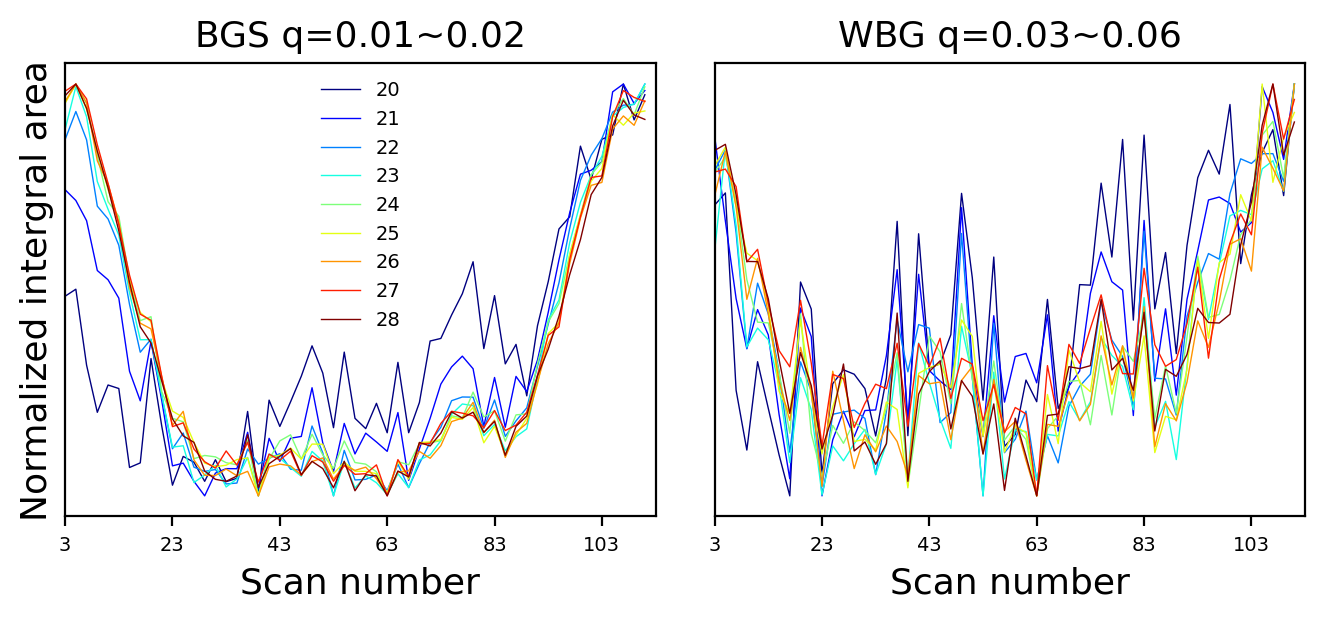

In [30]:
fig2 = plt.figure(figsize=(8, 3), dpi=200)
grid = plt.GridSpec(1, 2, hspace=0.25, wspace=0.1)

scannum = int(SAXS_integral_relax.columns[-1])
startnum = int(SAXS_integral_relax.columns[0])
colnum = len(SAXS_integral_relax.columns)

cmap = plt.cm.get_cmap("jet")
norm = mpl.colors.Normalize(vmin = startnum, vmax = scannum)

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

### plot and set the color
colors = plt.cm.jet(np.linspace(0, 1, colnum))


SAXS_BGS = fig2.add_subplot(grid[0, 0])
SAXS_WBG = fig2.add_subplot(grid[0, 1])


i=0
for col in SAXS_integral_relax.columns:
    SAXS_BGS.plot(scan_relax['scan'], SAXS_integral_relax[col], color=colors[i], lw=0.5)
    i=i+1

    #r1: 11~34
    #r2: 42~65
    #r3: 81~128 (middle)
    #r4: 140~164
    #r5: 172~196
    #r6: 204~230
"""    
sh = [7,20, 23,32, 40,64, 71,81, 87,99, 102,115]
i=0

for n in range(6):
    SAXS_BGS.axvspan(sh[i], sh[i+1], color='plum', alpha=0.5, lw=0)
    i=i+2
"""
SAXS_BGS.set_xlabel('Scan number',fontdict={'fontsize':13})
SAXS_BGS.set_ylabel('Normalized intergral area',fontdict={'fontsize':13})
#SAXS_BGS.set_ylim(0.5e7, 1.2e7)
SAXS_BGS.set_xlim(0,len(finaldfs_relax.columns))
SAXS_BGS.set_xticks(np.arange(0, len(finaldfs_relax.columns) , step = 10 ))
SAXS_BGS.set_yticks([])
SAXS_BGS.set_title('BGS q='+'%.2f~'%d1+'%.2f'%d2 ,fontdict={'fontsize':13})
SAXS_BGS.tick_params(axis='x',
                    which='both',      # both major and minor ticks are affected                         
                    bottom=True,
                    top=False,
                    labelbottom=True,
                    labeltop=False,
                    labelsize=7.0)  

SAXS_BGS.legend(SAXS_integral_relax.columns, frameon=False, fontsize=7)
#SAXS_BGS.grid()

i=0
for col in SAXS_integral_relax2.columns:
    SAXS_WBG.plot(scan_relax['scan'], SAXS_integral_relax2[col], color=colors[i], lw=0.5)
    i=i+1
"""
i=0

for n in range(6):
    SAXS_WBG.axvspan(sh[i], sh[i+1], color='plum', alpha=0.5, lw=0)
    i=i+2
"""
    
SAXS_WBG.set_xlabel('Scan number',fontdict={'fontsize':13})
SAXS_WBG.set_xlim(0,len(finaldfs_relax.columns))
SAXS_WBG.set_xticks(np.arange(0, len(finaldfs_relax.columns) , step = 10))
SAXS_WBG.set_yticks([])
SAXS_WBG.set_title('WBG q='+'%.2f~'%d3+'%.2f'%d4 ,fontdict={'fontsize':13})
SAXS_WBG.tick_params(axis='x',
                    which='both',      # both major and minor ticks are affected                         
                    bottom=True,
                    top=False,
                    labelbottom=True,
                    labeltop=False,
                    labelsize=7.0)  
    
"""ticks = list(range(startnum, scannum,1))
cbar = plt.colorbar(mappable = sm, ticks=ticks, format=mpl.ticker.ScalarFormatter(), 
                    shrink=1.0, fraction=0.1, pad=0.01, label='Frame number')"""

plt.savefig('BT2_02C SAXS integration'+'%.2f~'%d1 +'%.2f.png'%d2, bbox_inches='tight')